In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
import StructureFactor
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [11]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,800
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 4.3473474979400635


In [12]:
def Fermi_Vel(kx,ky):
    sq3y2=np.sqrt(3)*ky/2
    sq3y=np.sqrt(3)*ky
    vx=-tp1*(-2*np.cos(sq3y2)*np.sin(kx/2)-2*np.sin(kx)) +6*tp2*np.cos(sq3y2)*np.sin(3*kx/2)
    vy=2*np.sqrt(3)*tp1*np.cos(kx/2)*np.sin(sq3y2)-2*np.sqrt(3)*tp2*(-np.cos(3*kx/2)*np.sin(sq3y2)-np.sin(sq3y))
    return [vx,vy]



In [13]:
path=pathy+'data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

# Single Figs

Machine arg is, CH1


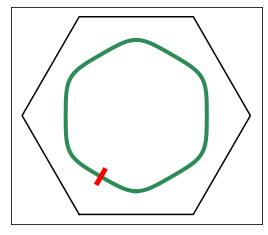

In [27]:

df2=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df2['T'].unique()[0])
df2.loc[(df2['theta'] == -4*np.pi/6)]
df2['Q']=-df2['Q']*np.sign(df2['QFX'])
T=1.0
df_one_temp=df2.loc[(df2['theta'] == -4*np.pi/6)&(df2['T'] == T)]

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()



thets=df_one_temp['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df_one_temp.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()

    plt.plot(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c='r',zorder=10, lw=5 )
    
im=plot(KxFS,KyFS,c='seagreen', lw=4)
plt.plot(vx,vy, c='k')
plt.gca().set_aspect('equal', adjustable='box')
plt.yticks([])
plt.xticks([])
plt.savefig("imgs/pap_fig_comp2.png", dpi=400)
show()


